# MNIST - Categorical Classification
> # Batch Normalization
## Import Tensorflow & Keras

* TensorFlow Version 지정

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'1.15.0'

* GPU 설정 확인

In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Keras Version 확인

In [0]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.5'

# I. MNIST Data_Set Load

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

* Normalization

In [0]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

> ## 2) One Hot Encoding

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 * 활성화 함수의 입력값을 정규화 과정을 수행하여 전달
 * Gradient Vanishing 문제 해결 및 더 큰 Learning Rate를 사용 가능

In [0]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [0]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

> ## 2) Model Compile

* 모델 학습방법 설정

In [0]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행(약 5분)

In [0]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/100





48000/48000 [==============================] - 11s 220us/step - loss: 0.1832 - acc: 0.9446 - val_loss: 0.1292 - val_acc: 0.9603
Epoch 2/100
48000/48000 [==============================] - 3s 53us/step - loss: 0.0713 - acc: 0.9783 - val_loss: 0.1021 - val_acc: 0.9690
Epoch 3/100
48000/48000 [==============================] - 2s 49us/step - loss: 0.0462 - acc: 0.9856 - val_loss: 0.0931 - val_acc: 0.9750
Epoch 4/100
48000/48000 [==============================] - 2s 49us/step - loss: 0.0319 - acc: 0.9905 - val_loss: 0.0859 - val_acc: 0.9755
Epoch 5/100
48000/48000 [==============================] - 2s 49us/step - loss: 0.0234 - acc: 0.9920 - val_loss: 0.0859 - val_acc: 0.9778
Epoch 6/100
48000/48000 [==============================] - 2s 51us/step - loss: 0.0181 - acc: 0.9940 - val_loss: 0.0883 - val_acc: 0.9798
Epoch 7/100
48000/

> ## 4) 학습 결과 시각화

* Loss Visualization

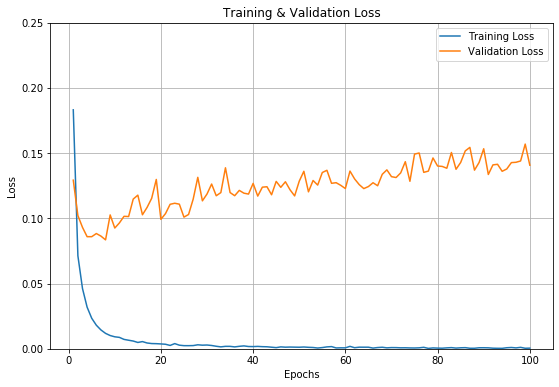

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [0]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

10000/10000 [==============================] - 0s 48us/step
Loss = 0.12933
Accuracy = 0.98380


# 
# 
# 
# The End
# 
# 
# 